In [2]:
import xarray as xr
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from cftime import DatetimeNoLeap
import cftime as cf
import matplotlib.pyplot as plt

# TODO: try converting rain to cf time instea do fhte other way around

# MPI-ESM1-2-LR -7.5hrs, need pr in gregorian, don't think I need to change tracks?
# MPI-ESM1-2-HR -6hrs4mins, need pr in gregorian not proleptic greg
# TaiESM1 might be +15hr ahead or +27hrs with lat_1, or +33hrs with lat_2
# IPSL in gregorian


In [40]:
# pr_path = '/user/home/al18709/work/CMIP6/MPI-ESM1-2-LR/pr/historical/pr_3hr_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_197901010300-197912312100.nc'
# tr_path = '/user/home/al18709/work/CMIP6/MPI-ESM1-2-LR/tracks/historical/SH/MPI-ESM1-2-LR_tracks_r1i1p1f1_19791980_newtime2.nc'
pr_path = '/bp1/geog-tropical/data/CMIP6/HighResMIP-rain/CMCC/CMCC-CM2-VHR4/hist-1950/r1i1p1f1/Prim6hr/pr/gn/latest/pr_Prim6hr_CMCC-CM2-VHR4_hist-1950_r1i1p1f1_gn_199402-199402.nc'
tr_path = '/user/home/al18709/work/CMIP6/HighResMIP/CMCC-CM2-VHR4/historical/tracks/TC-NH_TRACK_CMCC-CM2-VHR4_hist-1950_r1i1p1f1_gn_19500101-20141231.nc'
pr_path = '/bp1/geog-tropical/data/CMIP6/HighResMIP-rain/MPI/MPI-ESM1-2-HR/hist-1950/r1i1p1f1/Prim6hr/pr/gn/latest/pr_Prim6hr_MPI-ESM1-2-HR_hist-1950_r1i1p1f1_gn_201401010556-201412312356.nc'
tr_path = '/user/home/al18709/work/CMIP6/HighResMIP/MPI-ESM1-2-HR/historical/tracks/TC-NH_TRACK_MPI-ESM1-2-HR_hist-1950_r1i1p1f1_gn_19500101-20141231.nc'
pr_path = '/bp1/geog-tropical/data/CMIP6/CMIP6-rain/TaiESM1/pr/ssp585/pr_6hrPlev_TaiESM1_ssp585_r1i1p1f1_gn_201501010000-202412312100.nc'
tr_path = '/user/home/al18709/work/CMIP6/TaiESM1/tracks/ssp585/NH/TaiESM1_tracks_r1i1p1f1_2058_newtime2.nc'
# pr_path = '/user/home/al18709/work/CMIP6/MIROC6/pr/historical/pr_6hrPlev_MIROC6_historical_r1i1p1f1_gn_197901010300-197912312100.nc'
# tr_path = '/user/home/al18709/work/CMIP6/MIROC6/tracks/historical/SH/MIROC6_tracks_r1i1p1f1_19791980_newtime2.nc'
# pr_path = '/bp1/geog-tropical/data/CMIP6/CMIP6-rain/NorESM2-LM/pr/ssp585/pr_6hrPlev_NorESM2-LM_ssp585_r1i1p1f1_gn_206001010300-206012312100.nc'
# # pr_path = '/bp1/geog-tropical/data/CMIP6/CMIP6-rain/NorESM2-LM/pr/ssp585/pr_6hrPlev_NorESM2-LM_ssp585_r1i1p1f1_gn_206001010300-206012312100_regrid.nc'
# tr_path = '/user/home/al18709/work/CMIP6/NorESM2-LM/tracks/ssp585/SH/NorESM2-LM_tracks_r1i1p1f1_20502051_newtime2.nc'
# pr_path = '/bp1/geog-tropical/data/CMIP6/CMIP6-rain/IPSL-CM6A-LR/pr/ssp585/pr_3hr_IPSL-CM6A-LR_ssp585_r1i1p1f1_gr_205001010300-205012312100.nc'
# tr_path = '/user/home/al18709/work/CMIP6/IPSL-CM6A-LR/tracks/ssp585/SH/IPSL-CM6A-LR_tracks_r1i1p1f1_20502051_newtime2.nc'
# pr_path = '/bp1/geog-tropical/data/CMIP6/CMIP6-rain/BCC-CSM2-MR/pr/historical/pr_3hr_BCC-CSM2-MR_historical_r1i1p1f1_gn_201401010300-201412312100.nc'
# tr_path = '/user/home/al18709/work/CMIP6/BCC-CSM2-MR/tracks/historical/NH/BCC-CSM2-MR_tracks_r1i1p1f1_2014_newtime2.nc'
# tr_path = '/user/home/al18709/work/CMIP6/HighResMIP/EC-Earth3P-HR/tracks/historical/SH/TC-SH_TRACK_EC-Earth3P-HR_hist-1950_r1i1p2f1_gr_19500101-20141231.nc'
# pr_path = '/bp1/geog-tropical/data/CMIP6/HighResMIP-rain/EC-Earth3P-HR/pr/historical/pr_3hr_EC-Earth3P-HR_hist-1950_r1i1p2f1_gr_198201010000-198212312100.nc'

# pr_path = '/bp1/geog-tropical/data/CMIP6/CMIP6-rain/BCC-CSM2-MR/pr/historical/pr_3hr_BCC-CSM2-MR_historical_r1i1p1f1_gn_201401010300-201412312100.nc'
# tr_path = '/user/home/al18709/work/CMIP6/BCC-CSM2-MR/tracks/historical/NH/BCC-CSM2-MR_tracks_r1i1p1f1_2014_newtime2.nc'

# pr_path = '/bp1/geog-tropical/data/CMIP6/HighResMIP-rain/CMCC/CMCC-CM2-VHR4/hist-1950/r1i1p1f1/Prim6hr/pr/gn/latest/pr_Prim6hr_CMCC-CM2-VHR4_hist-1950_r1i1p1f1_gn_199402-199402.nc'
# tr_path = '/user/home/al18709/work/CMIP6/HighResMIP/CMCC-CM2-VHR4/historical/tracks/TC-NH_TRACK_CMCC-CM2-VHR4_hist-1950_r1i1p1f1_gn_19500101-20141231.nc'
pr = xr.open_dataset(pr_path,use_cftime=True)
# pr = pr.convert_calendar('proleptic_gregorian', dim='time', align_on=None, missing=None, use_cftime=None)
# pr = pr.convert_calendar('gregorian', dim='time', align_on=None, missing=None, use_cftime=None)
# pr = pr.convert_calendar("noleap")
tr = xr.open_dataset(tr_path,use_cftime=True)
# tr = tr.convert_calendar("noleap",dim='time')
# tr = tr.convert_calendar('proleptic_gregorian', dim='time', align_on=None, missing=None, use_cftime=True)
# tr.time.attrs['calendar'] = 'noleap'
# # .convert_calendar("noleap",dim='time')
# tr = xr.decode_cf(tr,decode_times=True)

# tr = tr.convert_calendar('proleptic_gregorian', dim='time', align_on=None, missing=None, use_cftime=True)
# days since 1948-12-01 00:00:00
# 365_day but thinks its proleptic greg. so Feb 29th doesn't exist.
# so doy = doy until 28th feb, the doy in 365 is = doy-1 in the p_g cal


In [41]:
print(tr.dims)

Frozen({'tracks': 77, 'record': 3846})


In [42]:
# print(pr.time)
# print(pr.time)
print(tr.time)
# print(pr.time.dt.calendar)
# print(tr.tim.attrs)
# tr = tr.expand_dims(time2=tr.time)
# pr = pr.convert_calendar('365_day', dim='time', align_on=None, missing=None, use_cftime=None)
# tr = tr.convert_calendar('proleptic_gregorian', dim='time', align_on=None, missing=None, use_cftime=True)

<xarray.DataArray 'time' (record: 3846)>
[3846 values with dtype=object]
Coordinates:
    time         (record) object ...
    longitude    (record) float32 ...
    latitude     (record) float32 ...
    longitude_1  (record) float32 ...
    latitude_1   (record) float32 ...
    longitude_2  (record) float32 ...
    latitude_2   (record) float32 ...
    longitude_3  (record) float32 ...
    latitude_3   (record) float32 ...
    longitude_4  (record) float32 ...
    latitude_4   (record) float32 ...
Dimensions without coordinates: record
Attributes:
    standard_name:  time
    long_name:      Time
    time_calendar:  365_day
    start:          2058010100
    step:           6


In [43]:
print(tr.variables)

Frozen({'TRACK_ID': <xarray.Variable (tracks: 77)>
[77 values with dtype=int32]
Attributes:
    add_fld_num:      4
    tot_add_fld_num:  12
    loc_flags:        [1 1 1 1]
    cf_role:          trajectory_id, 'FIRST_PT': <xarray.Variable (tracks: 77)>
[77 values with dtype=int32], 'NUM_PTS': <xarray.Variable (tracks: 77)>
[77 values with dtype=int32]
Attributes:
    long_name:         number of obs for this trajectory
    sample_dimension:  record, 'index': <xarray.Variable (record: 3846)>
[3846 values with dtype=int32], 'time': <xarray.Variable (record: 3846)>
[3846 values with dtype=object]
Attributes:
    standard_name:  time
    long_name:      Time
    time_calendar:  365_day
    start:          2058010100
    step:           6, 'longitude': <xarray.Variable (record: 3846)>
[3846 values with dtype=float32]
Attributes:
    standard_name:  longitude
    long_name:      Longitude
    units:          degrees_east, 'latitude': <xarray.Variable (record: 3846)>
[3846 values with dtype=f

In [44]:
print(tr.time.values)
print(pr.time.values)

[cftime.DatetimeNoLeap(2058, 1, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2058, 1, 1, 6, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2058, 1, 1, 12, 0, 0, 0, has_year_zero=True) ...
 cftime.DatetimeNoLeap(2058, 12, 31, 6, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2058, 12, 31, 12, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2058, 12, 31, 18, 0, 0, 0, has_year_zero=True)]
[cftime.DatetimeNoLeap(2015, 1, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2015, 1, 1, 3, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2015, 1, 1, 9, 0, 0, 0, has_year_zero=True) ...
 cftime.DatetimeNoLeap(2024, 12, 31, 9, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2024, 12, 31, 15, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2024, 12, 31, 21, 0, 0, 0, has_year_zero=True)]


In [45]:
# print(tr.longitude.values)
# print(tr.longitude_1.values)
# print(tr.longitude_2.values)
# print(pr.lon.values)

# print(tr.latitude.values)
# print(tr.latitude_1.values)
# print(tr.latitude_2.values)
# print(pr.lat.values)

In [46]:
i = 0
i = 1000
# i = 300
# i = 20
# i = 91840
# i = 95998
# i = 210750
# i = 1000
# print(tr.latitude.values[i])
# print(tr.longitude.values[i])
# print(tr.latitude_1.values[i])
# print(tr.longitude_1.values[i])
# print(tr.time)
# track_time: cf.DatetimeNoLeap = tr.time.values[i]
track_time = tr.time.values[i]
track_lat = tr.latitude.values[i]
track_lon = tr.longitude.values[i]
print(track_time)
# track_lat = tr.lat_sfcWind.values[i]
# track_lon = tr.lon_sfcWind.values[i]
# track_lat = tr.latitude_2.values[i]
# track_lon = tr.longitude_2.values[i]

print(track_lat)
print(track_lon)

# track_lat = tr.latitude_1.values[i]
# track_lon = tr.longitude_1.values[i]


# track_lat = tr.latitude_2.values[i]
# track_lon = tr.longitude_2.values[i]

# track_lat = tr.latitude_3.values[i]
# track_lon = tr.longitude_3.values[i]

# track_lat = tr.latitude_4.values[i]
# track_lon = tr.longitude_4.values[i]


2058-06-23 12:00:00
36.827972
198.55939


In [47]:
# print(pr.time)
print(pr.pr.values)

[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 ...

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan n

In [15]:
# rainfall_slice = pr.sel(time=track_time - np.timedelta64(7,'h') - np.timedelta64(30,'m')).pr
# rainfall_slice = pr.sel(time=track_time - np.timedelta64(1,'h') - np.timedelta64(30,'m')).pr
# rainfall_slice = pr.sel(time=track_time + np.timedelta64(23,'h') + np.timedelta64(56,'m')).pr
# rainfall_slice = pr.sel(time=track_time - np.timedelta64(6,'h') - np.timedelta64(4,'m')).pr
# rainfall_slice = pr.sel(time=track_time,method='nearest').pr
# rainfall_slice = pr.sel(time=track_time + np.timedelta64(15,'h')).pr
# print(track_time)

# time_1: DatetimeNoLeap = cf.datetime(
#     calendar="noleap",
#     year=track_time.year,
#     month=track_time.month,
#     day=track_time.day,
#     hour=track_time.hour
# )

# year = track_time.year
# month=track_time.month,
# day=track_time.day,
# hour=track_time.hour
# (m,) = month
# print(m)
# if m in [3,4,5,6,7,8,9,10,11,12]:
#     print(day)
#     (d,) = day
#     day = d - 1

# time_1= cf.datetime(
#     calendar="proleptic_gregorian",
#     year=year,
#     month=month,
#     day=day,
#     hour=hour)


time_1= cf.datetime(
    calendar="noleap",
    year=track_time.year,
    month=track_time.month,
    day=track_time.day,
    hour=track_time.hour
)

# time_1= cf.datetime(
#     calendar="proleptic_gregorian",
#     doy = track_time.doy
# )

time_2 = time_1 - timedelta(hours=3)
# time_2 = time_1 + timedelta(days = 36,hours=13,minutes=30)
# time_2 = time_1


print(time_1)
print(time_2)
# # print(time_3)
# # print(pr.sel(time=time_1).time)
# # print(pr.sel(time=time_2).time.values)
# print(pr.sel(time=cf.DatetimeNoLeap(1994, 2, 28, 18, 0, 0, 0, has_year_zero=True)))
rainfall_slice = pr.sel(time=time_2,method='nearest').pr
# # rainfall_slice = pr.sel(time=time_3).pr
# # rainfall_slice = pr.sel(time=time_1,method='nearest').pr
lat2d,lon2d = np.meshgrid(pr.lon,pr.lat)
# print(rainfall_slice.shape)
# print(lat2d.shape)
# print(lon2d.shape)

2058-06-23 12:00:00
2058-06-23 09:00:00


(188.55938720703125,
 208.55938720703125,
 26.827972412109375,
 46.827972412109375)

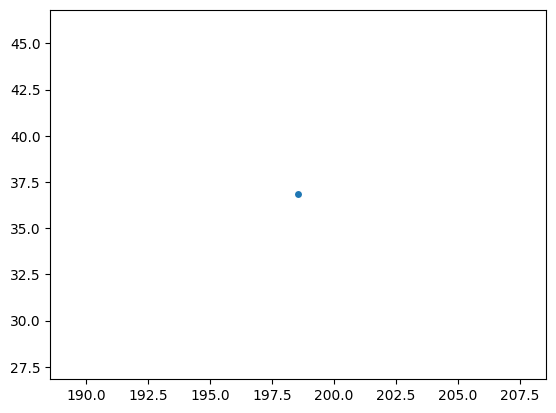

In [16]:
plt.contourf(lat2d,lon2d,rainfall_slice)
plt.scatter(track_lon,track_lat,edgecolor='white',facecolor=None)
# plt.scatter(track_lon1,track_lat1,edgecolor='Blue')
# plt.scatter(track_lon2,track_lat2,edgecolor='red') #best
# plt.scatter(track_lon3,track_lat3,edgecolor='green')
# plt.scatter(track_lon4,track_lat4,edgecolor='black')
plt.axis([track_lon-10,track_lon+10,track_lat-10,track_lat+10])
# plt.axis([150,170, 44, 54])

<xarray.DataArray 'pr' (lat: 1800, lon: 3600)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
    time     object 2058-03-28 15:00:00
  * lon      (lon) float64 -179.9 -179.8 -179.8 -179.6 ... 179.8 179.9 180.0
  * lat      (lat) float64 -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    units:          kg m-2 s-1
    comment:        includes both liquid and solid phases
    original_name:  PRECT
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2020-08-27T22:45:12Z altered by CMOR: Converted type from...
<xarray.DataArray 'pr' (lat: 1800, lon: 3600)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0

(188.55938720703125,
 208.55938720703125,
 26.827972412109375,
 46.827972412109375)

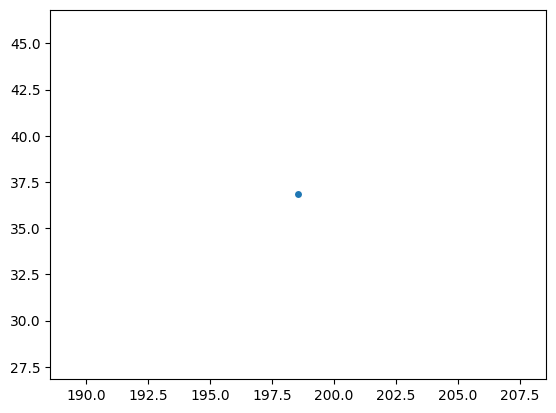

In [17]:
print(rainfall_slice)
print(rainfall_slice.where((rainfall_slice < 0), 0))
# 2014-06-24 13:30:00
# 2014-05-19 00:00:00
"""recreate by running with track year 2013 and rain year 2014, then timedelta is -365 days, then run again but with 2014 2014 which
throws an error cos the year is still 365 days behind, but the plot looks CORRECT!?"""

# 2014-01-12 19:30:00
# 2014-01-06 00:00:00

plt.contourf(lat2d,lon2d,rainfall_slice.where(~(rainfall_slice < 0), 0))
plt.scatter(track_lon,track_lat,edgecolor='white',facecolor=None)
# plt.scatter(track_lon1,track_lat1,edgecolor='Blue')
# plt.scatter(track_lon2,track_lat2,edgecolor='red') #best
# plt.scatter(track_lon3,track_lat3,edgecolor='green')
# plt.scatter(track_lon4,track_lat4,edgecolor='black')
plt.axis([track_lon-10,track_lon+10,track_lat-10,track_lat+10])